## Segmentation
@moon

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
plt.gray()
from ipywidgets import interact, fixed
external_viewer = sitk.ImageViewer()
slicer_app_location = r"C:\Users\59344\AppData\Local\NA-MIC\Slicer 5.2.2\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)
%config Completer.use_jedi = False

<Figure size 640x480 with 0 Axes>

size:  (256, 256, 112)
spacing:  (0.9375, 0.9375, 1.399999976158142)
pixel type:  16-bit signed integer


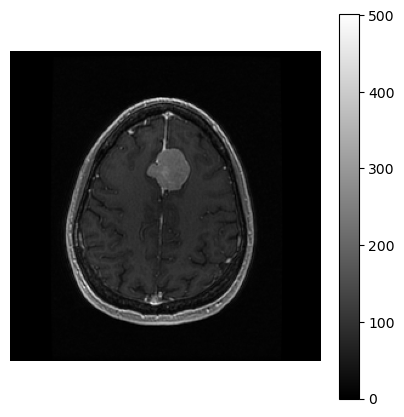

In [2]:
# read the data
img = sitk.ReadImage('BrainTumor.nii')

print('size: ',img.GetSize())
print('spacing: ',img.GetSpacing())
print('pixel type: ',img.GetPixelIDTypeAsString())

slice_no = 76
plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.colorbar()
plt.axis('off')
plt.show()

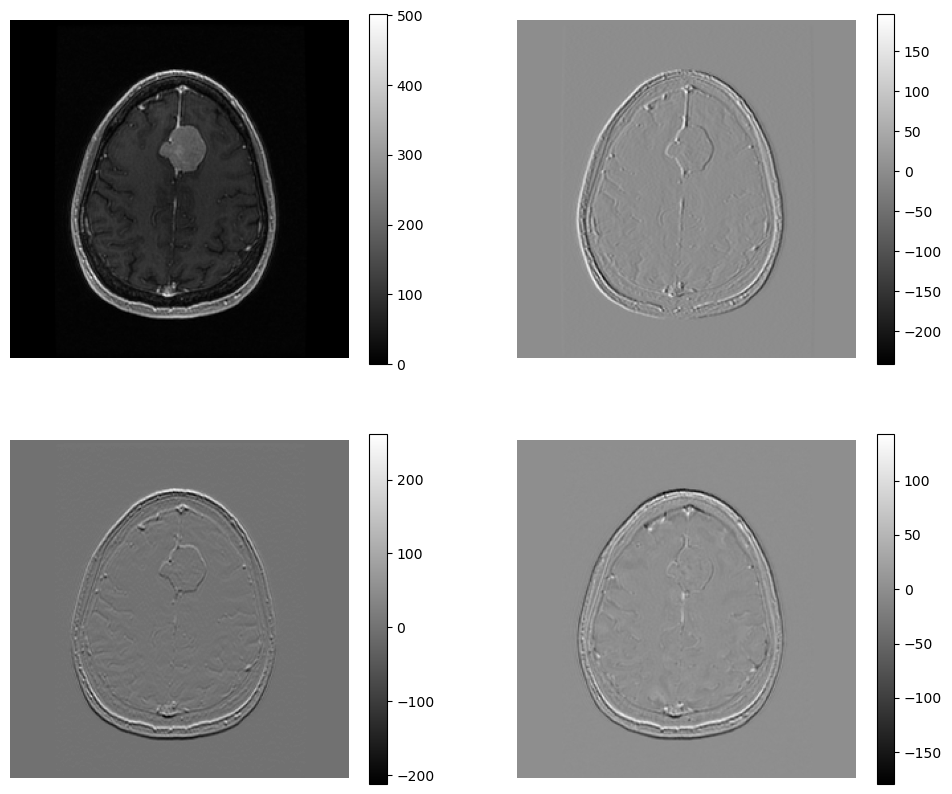

In [3]:
# gradient (directional)(vectors ijk)
grad_filter = sitk.GradientImageFilter()
img_filtered = grad_filter.Execute(img)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.axis('off')
plt.colorbar()
plt.subplot(2,2,2)
# i, detect i (horizental) direction edges
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no])[:,:,0])
plt.axis('off')
plt.colorbar()
plt.subplot(2,2,3)
# j, detect j (vertical) direction edges
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no])[:,:,1])
plt.axis('off')
plt.colorbar()
plt.subplot(2,2,4)

# k, detect k (into images) direction edges
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no])[:,:,2])
plt.axis('off')
plt.colorbar()
plt.show()

In [4]:
# sobel filter

# RuntimeError: Exception thrown in SimpleITK SobelEdgeDetectionImageFilter_Execute: c:\miniconda\envs\bld\conda-bld\work\code\common\include\sitkMemberFunctionFactory.hxx:158:
# sitk::ERROR: Pixel type: 16-bit signed integer is not supported in 3D by class itk::simple::SobelEdgeDetectionImageFilter.
# Need to change pixel to float

sobel_filter = sitk.SobelEdgeDetectionImageFilter()
img_filtered = sobel_filter.Execute(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.show()

RuntimeError: Exception thrown in SimpleITK SobelEdgeDetectionImageFilter_Execute: c:\miniconda\envs\bld\conda-bld\work\code\common\include\sitkMemberFunctionFactory.hxx:158:
sitk::ERROR: Pixel type: 16-bit signed integer is not supported in 3D by class itk::simple::SobelEdgeDetectionImageFilter.

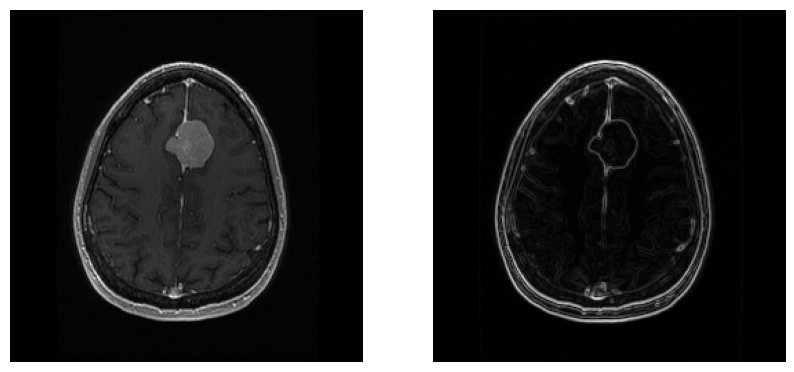

In [5]:
img = sitk.Cast(img, sitk.sitkFloat32)
sobel_filter = sitk.SobelEdgeDetectionImageFilter()
img_filtered1 = sobel_filter.Execute(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered1[:,:,slice_no]))
plt.axis('off')
plt.show()

### Breakout
Implement the LoG edge detection as follow:
* find the Gaussian image filter and apply it to your image (set variance to 5)
* find the Laplacian image filter and apply it to previous result
* threshold the result of LoG with simple comparisonc(set threshold to 2)
* find the zero-crossing image filter and apply it to previous result
* check how changing the variance of the Gaussian filter and the threshold value affect the final result

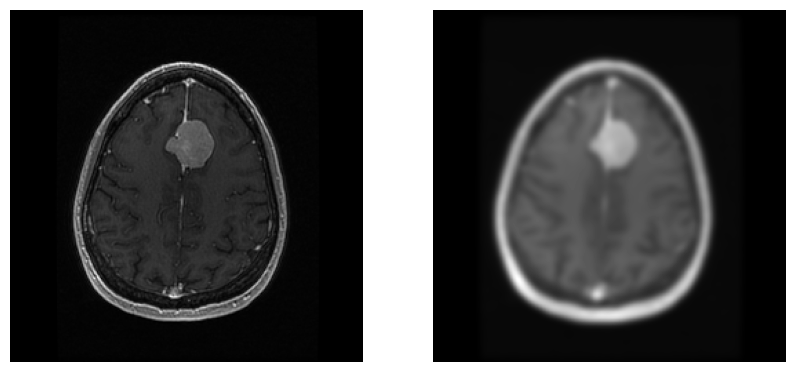

In [6]:
img = sitk.Cast(img, sitk.sitkFloat32)
gaussian_filter = sitk.DiscreteGaussianImageFilter()
gaussian_filter.SetVariance(5)

img_filtered = gaussian_filter.Execute(img)







plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.show()

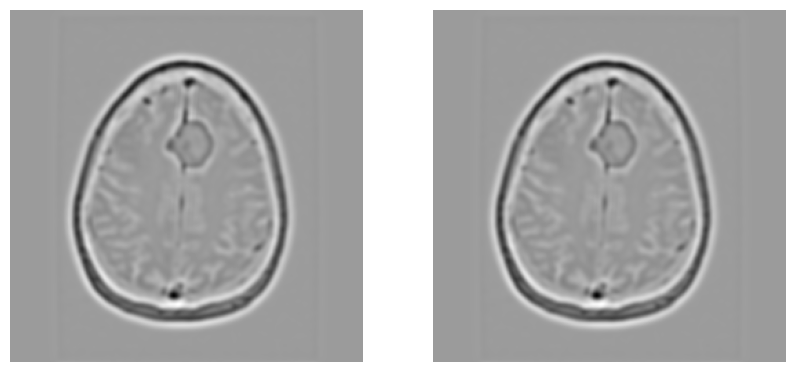

In [7]:

Laplacian_filter = sitk.LaplacianImageFilter()

img_filtered = Laplacian_filter.Execute(img_filtered)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.show()

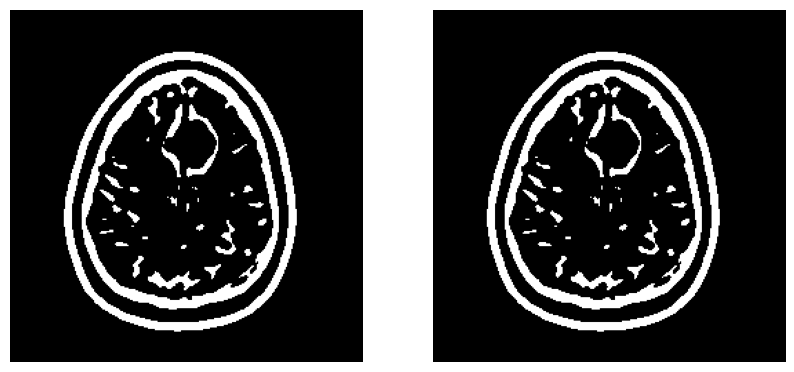

In [8]:
# ThresholdImageFilter = sitk.ThresholdImageFilter()
# ThresholdImageFilter.SetUpper(2)
# img_filtered = ThresholdImageFilter.Execute(img_filtered)
img_filtered = img_filtered > 2


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.show()

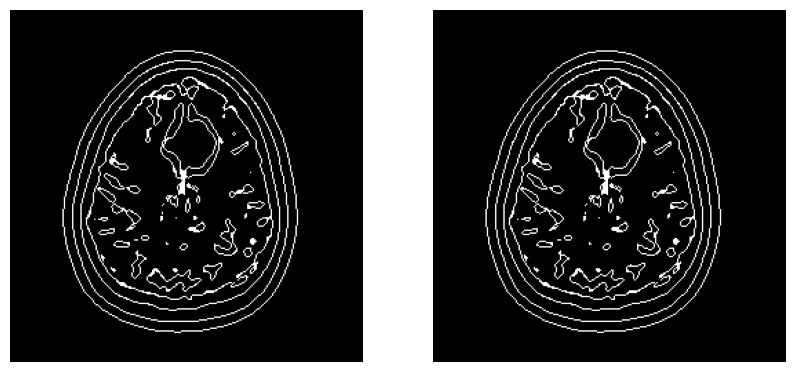

In [9]:
img_filtered = sitk.Cast(img_filtered, sitk.sitkFloat32)
ZeroCrossingImageFilter = sitk.ZeroCrossingImageFilter()

img_filtered = ZeroCrossingImageFilter.Execute(img_filtered)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_filtered[:,:,slice_no]))
plt.axis('off')
plt.show()

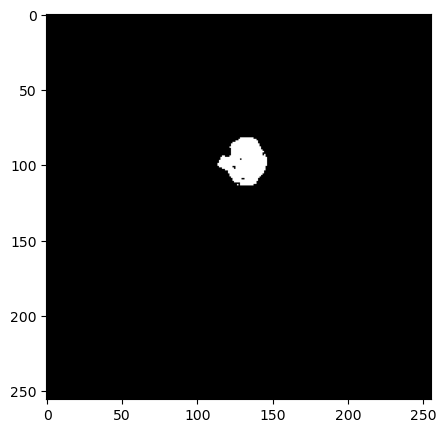

In [11]:
seg_filter = sitk.ConfidenceConnectedImageFilter()
seg_filter.SetNumberOfIterations(5)  # Adjust the number of iterations as needed
seg_filter.SetInitialNeighborhoodRadius(4)  # Adjust the initial neighborhood radius as needed
seg_filter.SetMultiplier(2.5)  # Adjust the multiplier as needed
seg_filter.SetSeedList([(130, 96,76)])
segmented_image = seg_filter.Execute(img_filtered1)


plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayViewFromImage(segmented_image)[76,:,:], cmap='gray')

In [12]:
print('size: ',segmented_image.GetSize())
print('spacing: ',segmented_image.GetSpacing())
print('pixel type: ',segmented_image.GetPixelIDTypeAsString())

size:  (256, 256, 112)
spacing:  (0.9375, 0.9375, 1.399999976158142)
pixel type:  8-bit unsigned integer


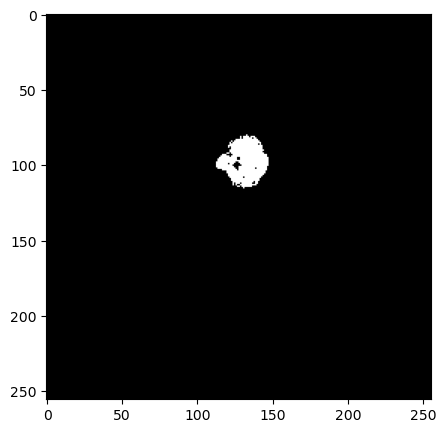

In [13]:
seg_filter = sitk.ConfidenceConnectedImageFilter()
seg_filter.SetNumberOfIterations(5)  # Adjust the number of iterations as needed
seg_filter.SetInitialNeighborhoodRadius(4)  # Adjust the initial neighborhood radius as needed
seg_filter.SetMultiplier(2.5)  # Adjust the multiplier as needed
seg_filter.SetSeedList([(130, 96,76)])
segmented_image = seg_filter.Execute(img)


plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayViewFromImage(segmented_image)[76,:,:], cmap='gray')